<Body>   
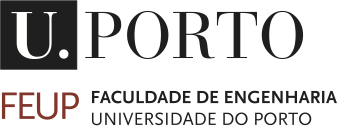   
<h1> <b>Computer Vision 2022/2023 </b> </h1>
<p><b>Andry Maykol Pinto </b> (amgp@fe.up.pt)</p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  
FEUP

---

# Outlier detection and treatment

<h2>Table of contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="#ref1">Detecting outliers with boxplot</a></li>
    <li><a href="#ref2">Detecting outliers with Z-score</a></li>
    <li><a href="#ref3">Detecting outliers with Inter Quantile Range (IQR)</a></li>
    <li><a href="#ref4">Dealing with Outliers</a></li>
    <li><a href="#ref5">RANSAC estimator</a></li>
</ol>
<p></p>
</div>
<hr>


If our dataset is small, we can detect the outlier by just looking at the dataset. But what if we have a huge dataset? How do we identify the outliers then? We need to use visualization and mathematical techniques.

Below are some of the techniques of detecting outliers:

*   Boxplots;
*   Z-score;
*   Inter Quantile Range(IQR);



<a id="ref1"></a>
## Detecting outliers with boxplot

The Boxplot technique can be used to visualize and/or identify outliers in the data (which means, there is a great deviation from an element to a distribution?). 

Consider that our inlier values are within 0 and 10. Let's generate 10 outlier values between 50 and 80, which represent the lower and upper limits. 


In [4]:
%pip install numpy matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 94.9 MB/s eta 0:00:00:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 kB 74.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 93.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 142.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 93.0 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Text(0.5, 0, 'Sample')

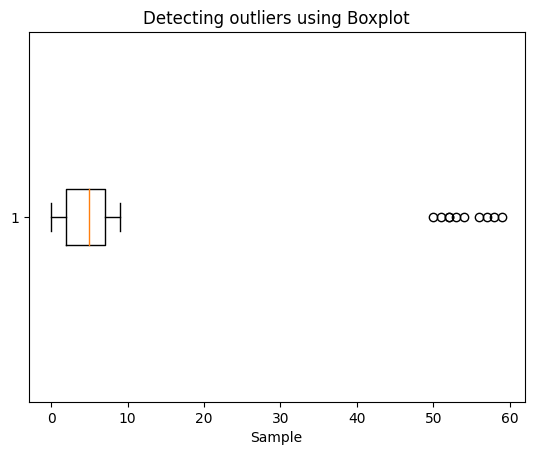

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# inlier
data = np.random.randint(0,10,200)
#outlier
outliers = np.random.randint(50,60,10)
9
# concatenate data, producing "sample"
samples = np.concatenate((data, outliers), axis=0)

#Plotting
plt.boxplot(samples, vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Sample')

As can be seen, if we have substancially more inliers than outliers, the boxplot can be used to model our samples (and to detect potential outliers). 

<a id="ref2"></a>
## Detecting outliers with Z-score

With the sample provided, write a function capable of detecting outliers based on the Z-Score Statistical Method.


In [3]:
# Receives "data" and returns "outliers" according to Z-Score
def detect_outliers_zscore(data, thres = 3):
    outliers = []
    #thres = 3                   #99.7% of the data points lie between +/- 3 standard deviation
    mean = np.mean(data)
    std = np.std(data)

    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers
    
sample_outliers = detect_outliers_zscore(samples)
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  []


------------------------------

**Exercise 1:**

Considering the following data, please calculate the outliers using a Z-score approach for N = 20 and N = 60. 

Discuss the differences.

In [12]:
import numpy as np
import matplotlib.pyplot as plt

#Number of Samples N+4
n = [20, 60]
thress = [3, 1]
for thres in thress:
    for N in n:
        # Generate Samples
        samples = np.random.normal(5.0, 1.4, N)
        samples = np.concatenate((samples, np.random.normal(50.0, 1.4, 4)), axis=0)

        # Detect outliers
        sample_outliers = detect_outliers_zscore(samples,thres)
        print(f"{N = },{thres= }, Outliers from Z-scores method: {sample_outliers}")

#plot inliers and outliers

N = 20,thres= 3, Outliers from Z-scores method: []
N = 60,thres= 3, Outliers from Z-scores method: [49.9265486234211, 49.20416794825226, 48.3691956866264, 51.57928972788919]
N = 20,thres= 1, Outliers from Z-scores method: [48.63239684420505, 48.57103465630392, 49.8318834068421, 52.52452193026723]
N = 60,thres= 1, Outliers from Z-scores method: [49.53611919913928, 50.092752890343775, 47.11773376681822, 50.99011801042077]


<a id="ref3"></a>
## Detecting outliers with Inter Quantile Range (IQR)


**Exercise 2:**
With the sample provided, write a function capable of detecting outliers based on the Inter Quantile Range Statistical Method.

Note: see numpy `percentile`

In [ ]:
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    #q1 = 
    #q3 = 
   
    #IQR = 
    #lwr_bound = 
    #upr_bound = 

    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
    
sample_outliers = detect_outliers_iqr(samples)
print("Outliers from IQR method: ", sample_outliers)

----------------------------------------------

<a id="ref4"></a>
# Dealing with Outliers

Until now, we learned about detecting outliers. There are some methods that can be used for dealing with outliers:

* Trimming/removing the outlier;
* Quantile based flooring and capping;
* Mean/Median imputation.

## Trimming

Deleting the outliers from the dataset

In [4]:
# Trimming
previous_sample = samples

for i in sample_outliers:
    samples = np.delete(samples, np.where(samples==i))
print(samples)

print(len(previous_sample), len(samples))


[3 0 2 1 2 1 3 9 9 2 9 0 2 3 0 6 6 2 4 7 8 3 4 1 8 9 5 8 2 5 5 5 5 3 0 4 6
 1 7 2 9 6 3 1 6 4 2 6 6 6 9 9 4 5 2 1 4 3 3 1 7 2 1 2 9 0 1 6 5 3 5 5 8 4
 7 0 2 5 4 7 0 5 9 6 0 2 4 7 0 6 5 3 1 3 9 9 8 7 5 4 3 3 8 1 2 9 7 9 5 1 6
 3 3 1 5 3 9 6 9 0 2 5 2 9 1 2 5 0 9 9 4 9 7 9 6 9 3 1 1 7 4 7 0 7 9 7 0 3
 5 8 3 9 6 6 1 8 9 5 2 1 2 6 5 0 4 7 0 4 5 8 4 4 4 8 1 7 9 4 0 4 4 8 4 4 9
 4 2 5 9 1 4 0 2 6 3 8 4 3 6 3]
210 200


## Quantile based flooring and capping

Compute the 10th and 90th percentiles and replace each outlier by its respective percentile value.

In [ ]:
# Computing 10th, 90th percentiles and replacing the outliers
samples = previous_sample
print(samples)

# 10 Percentile
tenth_percentile = np.percentile(samples, 10)
# 90 Percentile
ninetieth_percentile = np.percentile(samples, 90)
print("Tenth percentile:", tenth_percentile, "; Ninetieth percentile:", ninetieth_percentile, "; \n")

#The data points that are lesser than the 10th percentile are replaced with the 10th percentile value
b = np.where(samples<tenth_percentile, tenth_percentile, samples) 
print("The < 10th percentile are replaced with the 10th percentile value: \n", b ,"\n")

#The data points that are greater than the 90th percentile are replaced with 90th percentile value
b = np.where(b>ninetieth_percentile, ninetieth_percentile, b) 

print("The > 90th percentile are replaced with the 90th percentile value: \n", b ,"\n")

## Mean/Median imputation

Compute the median to replace the outliers using the median value. 

Use the Boxplot technique to visualize the results.


In [ ]:
# Replace with median
print("Sample: ", samples)
median = np.median(samples)

for i in sample_outliers:
    samples = np.where(samples==i, median, samples)

print("New array: ",samples)
# print(x.dtype)

plt.boxplot(samples, vert=False)
plt.title("Boxplot of the sample after treating the outliers")
plt.xlabel("Sample");

<a id="ref5"></a>

## RANSAC estimator

RANSAC regression algorithm (see [link](http://www.cse.yorku.ca/~kosta/CompVis_Notes/ransac.pdf) ) is a well known technique for calculating a model based on inliers. Instead of taking care of outliers based on a statistical technique, the RANSAC is an iterative process that:
1.   Randomly selecting a subset of the data set
2.   Fitting a model to the selected subset
3.   Determining the number of outliers by calculating the fitting error of the sample (should be < error_threshold) to the model obtained in 2. 
4.   Repeating steps 1-3 for a prescribed number of iterations.

----------------------
**Exercise 3**

Implement a function in Python of the RANSAC algorithm that estimates the inlier/outlier samples in a linear-regression problem problem (that uses the mean square error as a similarity measure). Your final result should be similar as the result of the RANSAC implementation in sklearn ([source](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ransac.html) )

Note: you can sort the residual error of each sample.



Estimated coefficients (true, linear regression, RANSAC):
82.1903908407869 [54.17236387] [82.08533159]


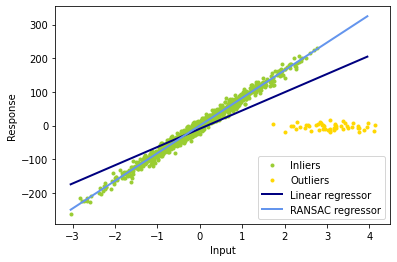

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model, datasets


n_samples = 1000
n_outliers = 50

# Simulate data
X, y, coef = datasets.make_regression(
    n_samples=n_samples,
    n_features=1,
    n_informative=1,
    noise=10,
    coef=True,
    random_state=0,
)
# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

## Linear regression
# Fit line using all data
lr = linear_model.LinearRegression()
lr.fit(X, y)

# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)



# Implement the RANSAC manually
# ...
# ...


## Comparing the results:

# Predict data of estimated models
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)

# Compare estimated coefficients
print("Estimated coefficients (true, linear regression, RANSAC):")
print(coef, lr.coef_, ransac.estimator_.coef_)

lw = 2
plt.scatter(
    X[inlier_mask], y[inlier_mask], color="yellowgreen", marker=".", label="Inliers"
)
plt.scatter(
    X[outlier_mask], y[outlier_mask], color="gold", marker=".", label="Outliers"
)
plt.plot(line_X, line_y, color="navy", linewidth=lw, label="Linear regressor")
plt.plot(
    line_X,
    line_y_ransac,
    color="cornflowerblue",
    linewidth=lw,
    label="RANSAC regressor",
)
plt.legend(loc="lower right")
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()

---------------------------
